# Working with graphs (Part 1)
Visualization

### In this exercise we will obtain a sample set of trees related with the Bats (Order) node. We will convert it to a Network object for visualizing and exploring graph properties.


In [1]:
## Import modules and libraries
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
import numpy as np
import matplotlib.pyplot as plt
# visualizing and analysing
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nt

## Biospytial modules

In [2]:
## Import modules
from drivers.tree_builder import TreeNeo
from drivers.graph_models import TreeNode, Order, Family, graph, pickNode
from traversals.strategies import sumTrees
from traversals.sampling import UniformRandomSampleForest


## Pick the node "Bats" (Chiroptera)

In [3]:
bats = pickNode(Order,'Chiropt')

In [4]:
%time cells = list(bats.cells)

CPU times: user 2min 59s, sys: 2.88 s, total: 3min 1s
Wall time: 4min 59s


In [5]:
trees = UniformRandomSampleForest(cells,10)

DEBUG Random list creates
DEBUG:biospytial.graph_models:Random list creates
DEBUG Random cells selected
DEBUG:biospytial.graph_models:Random cells selected


In [6]:
## trees is a generator -> cast to list
%time trees = list(trees)

DEBUG [Developer]: check that the Occurrences are the same that in the has_occurrences method
DEBUG:biospytial.graph_models:[Developer]: check that the Occurrences are the same that in the has_occurrences method
DEBUG [Developer]: check that the Occurrences are the same that in the has_occurrences method
DEBUG:biospytial.graph_models:[Developer]: check that the Occurrences are the same that in the has_occurrences method
DEBUG [Developer]: check that the Occurrences are the same that in the has_occurrences method
DEBUG:biospytial.graph_models:[Developer]: check that the Occurrences are the same that in the has_occurrences method
DEBUG [Developer]: check that the Occurrences are the same that in the has_occurrences method
DEBUG:biospytial.graph_models:[Developer]: check that the Occurrences are the same that in the has_occurrences method
DEBUG [Developer]: check that the Occurrences are the same that in the has_occurrences method
DEBUG:biospytial.graph_models:[Developer]: check that the 

CPU times: user 9.97 s, sys: 270 ms, total: 10.2 s
Wall time: 12.4 s


### It is possible to get faster data (not a random sample)

In [7]:
%time trees_fast = bats.getAssociatedTrees(first_n_cells=10)

INFO Retrieving cells
INFO:biospytial.graph_models:Retrieving cells
INFO Done!
INFO:biospytial.graph_models:Done!
INFO Retriving Occurrences
INFO:biospytial.graph_models:Retriving Occurrences


CPU times: user 10 ms, sys: 0 ns, total: 10 ms
Wall time: 7.47 ms


## Obtain a folded Tree (Sum, integral, etc..)
Here the importance of Monoid structure

In [8]:
bt = reduce(lambda a,b : a+b , trees)

INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees


## Frequencies analysis for each node using a given list of trees.

In [9]:
bt.countNodesFrequenciesOnList(trees)

INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.3
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.4
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.4
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.2
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.3
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.1
INFO Going deep 0.4
INFO Going deep 0.1
INFO Going deep 0.4
INFO Going deep 0.1
INFO Going deep 0.1


0.05

## Convert the TreeNeo object to a Network instance (networkx)
### The depth_level restricts the depth of the recursion process.

In [10]:
gt = bt.toNetworkx(depth_level=4)

## Visualizing the graph (now gt)

In [11]:
extractNames = lambda graph : {k:v for (k,v) in map(lambda n : (n,n.node.name),graph.nodes())}
extractColors = lambda graph :  map(lambda n : n.level,graph.nodes())
extractfreqs = lambda graph :  np.array(map(lambda n : n.n_presences_in_list,graph.nodes()))

/opt/conda/envs/biospytial/lib/python2.7/site-packages/pygraphviz/agraph.py:1338: RuntimeWarning: Fontconfig warning: ignoring C.UTF-8: not a valid language tag

  warnings.warn(b"".join(errors), RuntimeWarning)


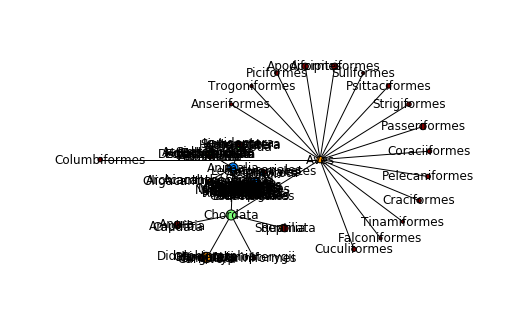

In [12]:
root = bt.node
pos = graphviz_layout(gt,prog='circo',root=root.node.name)
g_labels = bt.toNetworkx(depth_level=4)
nt.draw(gt,pos,labels=extractNames(g_labels),node_color=extractColors(gt),node_size=extractfreqs(gt)*100)
plt.show()

In [ ]:
## Convert to JSON and put it in the redis machine
from drivers.encoders import TreeNodeEncoder
from networkx.readwrite import json_graph
xx = json.dumps(json_graph.node_link_data(gt),cls=TreeNodeEncoder)